# Final Gantt on the Status of High Energy Astrophysics
Prelimiary plots as well as learning to make Gantt charts and searching the correct data (i.e. getting to know all $\gamma$-ray and X-ray mission in the last 30 years) can be found in another notebook named `GanttObservatories.ipynb`.

Plot saved to observatory_timeline.png


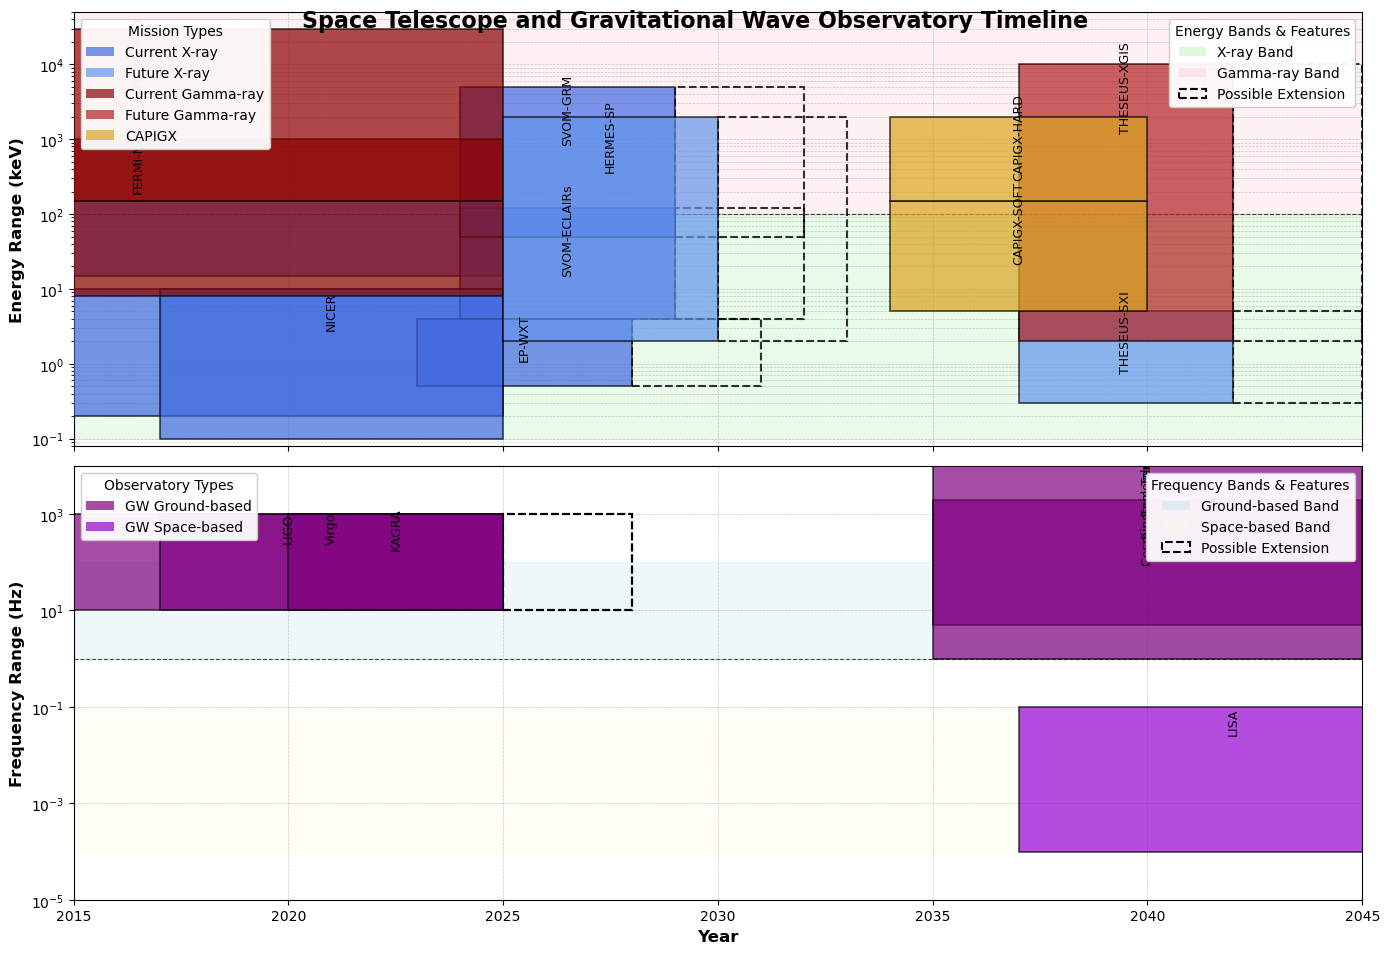

In [1]:
"""
Module: mission_timeline_plotter
Creates a detailed timeline of space telescope missions and gravitational wave observatories.
"""

from dataclasses import dataclass
from typing import Tuple, Literal, Optional, List
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch, Rectangle
from matplotlib.text import Annotation
import numpy as np

# --- Data Definitions ---
MissionType = Literal['current_xray', 'future_xray', 'current_gamma', 'future_gamma', 'capigx', 'gw_ground', 'gw_space']
ExtensionStatus = Literal['y', 'n']

@dataclass
class Observatory:
    """Data class representing a space telescope or gravitational wave observatory."""
    name: str
    energy_range_kev: Tuple[float, float]  # For GW observatories, this represents frequency range in Hz
    mission_range_years: Tuple[int, int]
    has_extension: ExtensionStatus
    type: MissionType
    source: str
    label_offset: Optional[Tuple[float, float]] = None  # For manual label adjustment
    is_gw: bool = False  # Flag to identify gravitational wave observatories

# --- Mission Data ---
telescopes = [
    Observatory('Swift-BAT', (15, 150), (2004, 2025), 'n', 'current_xray', 'source'),
    Observatory('Swift-XRT', (0.2, 10), (2004, 2025), 'n', 'current_xray', 'source'),
    Observatory('SVOM-ECLAIRs', (4, 120), (2024, 2029), 'y', 'current_xray', 'source'),
    Observatory('SVOM-GRM', (50, 5000), (2024, 2029), 'y', 'current_xray', 'source'),
    Observatory('EP-WXT', (0.5, 4), (2023, 2028), 'y', 'current_xray', 'source'),
    Observatory('NICER', (0.1, 10), (2017, 2025), 'n', 'current_xray', 'Description NICER website'),
    
    Observatory('FERMI-Nal', (8, 1000), (2008, 2025), 'n', 'current_gamma', 'source'),
    Observatory('FERMI-BGO', (150, 30000), (2008, 2025), 'n', 'current_gamma', 'source'),
    
    Observatory('THESEUS-SXI', (0.3, 5), (2037, 2042), 'y', 'future_xray', 'source'),
    Observatory('HERMES-SP', (2, 2000), (2025, 2030), 'y', 'future_xray', 'Evangelista et al.', (0, 100)),
    
    Observatory('THESEUS-XGIS', (2, 10000), (2037, 2042), 'y', 'future_gamma', 'source'),
    
    Observatory('CAPIGX-SOFT', (5, 150), (2034, 2040), 'n', 'capigx', 'alcaide-núñez 2025 inprep'),
    Observatory('CAPIGX-HARD', (150, 2000), (2034, 2040), 'n', 'capigx', 'alcaide-núñez 2025 inprep'),
]

# Gravitational Wave Observatories
gw_observatories = [
    # Current ground-based observatories (converted from Hz to "pseudo-keV" for plotting)
    Observatory('LIGO', (10, 1000), (2015, 2025), 'y', 'gw_ground', 'LIGO Collaboration', is_gw=True),
    Observatory('Virgo', (10, 1000), (2017, 2025), 'y', 'gw_ground', 'Virgo Collaboration', is_gw=True),
    Observatory('KAGRA', (10, 1000), (2020, 2025), 'y', 'gw_ground', 'KAGRA Collaboration', is_gw=True),
    
    # Future ground-based observatories
    Observatory('Cosmic Explorer', (5, 2000), (2035, 2045), 'n', 'gw_ground', 'Proposed', is_gw=True),
    Observatory('Einstein Telescope', (1, 10000), (2035, 2045), 'n', 'gw_ground', 'Proposed', is_gw=True),
    
    # Space-based observatories
    Observatory('LISA', (0.0001, 0.1), (2037, 2047), 'y', 'gw_space', 'ESA/NASA', is_gw=True),
]

# Combine all observatories
all_observatories = telescopes + gw_observatories

# --- Configuration ---
COLORS = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "capigx": "goldenrod",
    "gw_ground": "purple",
    "gw_space": "darkviolet"
}

DISPLAY_NAMES = {
    "current_xray": "Current X-ray",
    "future_xray": "Future X-ray",
    "current_gamma": "Current Gamma-ray", 
    "future_gamma": "Future Gamma-ray",
    "capigx": "CAPIGX",
    "gw_ground": "GW Ground-based",
    "gw_space": "GW Space-based"
}

X_LIMITS = (2015, 2045)  # Extended to show future GW observatories
Y_LIMITS_EM = (0.08, 50000)  # For electromagnetic observatories
Y_LIMITS_GW = (0.00001, 10000)  # For gravitational wave observatories (converted from Hz)
EXTENSION_LENGTH_YEARS = 3

# --- Plotting Function ---
def create_observatory_timeline_plot(observatories: List[Observatory], 
                                    output_path: Optional[str] = None,
                                    dpi: int = 300) -> plt.Figure:
    """
    Creates a timeline plot of observatories across energy/frequency and time.
    
    Args:
        observatories: List of Observatory objects
        output_path: If provided, saves the plot to this path
        dpi: Resolution for saved figure
        
    Returns:
        matplotlib Figure object
    """
    fig, (ax_em, ax_gw) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # Separate EM and GW observatories
    em_observatories = [obs for obs in observatories if not obs.is_gw]
    gw_observatories = [obs for obs in observatories if obs.is_gw]
    
    # Plot electromagnetic observatories
    _plot_em_observatories(ax_em, em_observatories)
    
    # Plot gravitational wave observatories
    _plot_gw_observatories(ax_gw, gw_observatories)
    
    # Configure overall figure
    plt.xlabel("Year", fontsize=12, fontweight='bold')
    fig.suptitle("Space Telescope and Gravitational Wave Observatory Timeline", 
                fontsize=16, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    
    # Save if requested
    if output_path:
        fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
        print(f"Plot saved to {output_path}")
    
    return fig

def _plot_em_observatories(ax: plt.Axes, observatories: List[Observatory]) -> None:
    """Plots electromagnetic observatories on the axes."""
    # Plot energy bands first (background)
    ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2, label="X-ray Band (0.1-100 keV)")
    ax.axhspan(ymin=100, ymax=10**5, color='lightpink', alpha=0.2, label="Gamma-ray Band (100-100,000 keV)")
    ax.axhline(y=100, color='black', linestyle='--', alpha=0.7, linewidth=0.8)
    
    # Plot each mission
    for obs in observatories:
        _plot_mission(ax, obs, Y_LIMITS_EM)
    
    # Configure axes and appearance
    ax.set_ylabel("Energy Range (keV)", fontsize=12, fontweight='bold')
    ax.set_yscale("log")
    ax.set_ylim(Y_LIMITS_EM)
    ax.set_xlim(X_LIMITS)
    
    # Create custom legends
    _create_em_legends(ax)
    
    # Grid and final styling
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

def _plot_gw_observatories(ax: plt.Axes, observatories: List[Observatory]) -> None:
    """Plots gravitational wave observatories on the axes."""
    # Plot frequency bands (converted from Hz to "pseudo-keV" for consistent plotting)
    ax.axhspan(ymin=1, ymax=100, color='lightblue', alpha=0.2, label="Ground-based Band (1-100 Hz)")
    ax.axhspan(ymin=0.0001, ymax=0.1, color='lightyellow', alpha=0.2, label="Space-based Band (0.0001-0.1 Hz)")
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.7, linewidth=0.8)
    
    # Plot each observatory
    for obs in observatories:
        _plot_mission(ax, obs, Y_LIMITS_GW)
    
    # Configure axes and appearance
    ax.set_ylabel("Frequency Range (Hz)", fontsize=12, fontweight='bold')
    ax.set_yscale("log")
    ax.set_ylim(Y_LIMITS_GW)
    ax.set_xlim(X_LIMITS)
    
    # Create custom legends
    _create_gw_legends(ax)
    
    # Grid and final styling
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

def _plot_mission(ax: plt.Axes, mission: Observatory, y_limits: Tuple[float, float]) -> None:
    """Plots a single mission on the axes."""
    color = COLORS[mission.type]
    launch, end_mission = mission.mission_range_years
    low_range, high_range = mission.energy_range_kev
    
    width = end_mission - launch
    height = high_range - low_range
    
    # Main mission rectangle
    rect = Rectangle((launch, low_range), width, height,
                     facecolor=color, alpha=0.7, edgecolor="black", 
                     linewidth=1.2, zorder=3)
    ax.add_patch(rect)
    
    # Mission extension
    if mission.has_extension == 'y':
        ext_rect = Rectangle((end_mission, low_range), EXTENSION_LENGTH_YEARS, height,
                             facecolor='none', edgecolor='black', linestyle='--', 
                             linewidth=1.5, alpha=0.8, zorder=2)
        ax.add_patch(ext_rect)
    
    # Add mission label with optional offset
    label_x = launch + width / 2
    label_y = low_range + height / 2
    
    if mission.label_offset:
        label_x += mission.label_offset[0]
        label_y += mission.label_offset[1]
    
    if X_LIMITS[0] < label_x < X_LIMITS[1] and y_limits[0] < label_y < y_limits[1]:
        # Use annotation for better positioning control
        ann = Annotation(mission.name, (label_x, label_y), 
                        xytext=(0, 0), textcoords='offset points',
                        ha='center', va='center', fontsize=9, 
                        color='black', rotation=90, zorder=4)
        ax.add_artist(ann)

def _create_em_legends(ax: plt.Axes) -> None:
    """Creates and places the legends for the EM observatories plot."""
    # Mission type legend
    mission_elements = [
        Patch(facecolor=color, alpha=0.7, label=DISPLAY_NAMES[mission_type])
        for mission_type, color in COLORS.items() if mission_type not in ['gw_ground', 'gw_space']
    ]
    mission_legend = ax.legend(handles=mission_elements, loc='upper left', 
                              title="Mission Types", title_fontsize=10,
                              framealpha=0.95)
    ax.add_artist(mission_legend)  # Add it manually so we can have two legends
    
    # Energy band legend
    band_elements = [
        Patch(facecolor='lightgreen', alpha=0.3, label='X-ray Band'),
        Patch(facecolor='lightpink', alpha=0.3, label='Gamma-ray Band'),
        Patch(facecolor='none', edgecolor='black', linestyle='--', 
              linewidth=1.5, label='Possible Extension')
    ]
    ax.legend(handles=band_elements, loc='upper right', 
             title="Energy Bands & Features", title_fontsize=10,
             framealpha=0.95)

def _create_gw_legends(ax: plt.Axes) -> None:
    """Creates and places the legends for the GW observatories plot."""
    # Mission type legend
    mission_elements = [
        Patch(facecolor=COLORS['gw_ground'], alpha=0.7, label=DISPLAY_NAMES['gw_ground']),
        Patch(facecolor=COLORS['gw_space'], alpha=0.7, label=DISPLAY_NAMES['gw_space'])
    ]
    mission_legend = ax.legend(handles=mission_elements, loc='upper left', 
                              title="Observatory Types", title_fontsize=10,
                              framealpha=0.95)
    ax.add_artist(mission_legend)  # Add it manually so we can have two legends
    
    # Frequency band legend
    band_elements = [
        Patch(facecolor='lightblue', alpha=0.3, label='Ground-based Band'),
        Patch(facecolor='lightyellow', alpha=0.3, label='Space-based Band'),
        Patch(facecolor='none', edgecolor='black', linestyle='--', 
              linewidth=1.5, label='Possible Extension')
    ]
    ax.legend(handles=band_elements, loc='upper right', 
             title="Frequency Bands & Features", title_fontsize=10,
             framealpha=0.95)

# --- Main execution ---
if __name__ == "__main__":
    # Create and display the plot
    fig = create_observatory_timeline_plot(all_observatories, output_path='observatory_timeline.png')
    plt.show()